In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/spam_old.csv",encoding='latin-1')

In [3]:
df.head()

,status,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   status  5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# df.drop(['Unnamed: 2','Unnamed: 3',"Unnamed: 4","Unnamed: 0"],axis=1,inplace=True)

In [7]:
# df.rename(columns={"v1":"status","v2":"sms"},inplace=True)

In [8]:
# df.to_csv("data/spam.csv",index=False)

In [9]:
# df.head()

<AxesSubplot:xlabel='status', ylabel='count'>

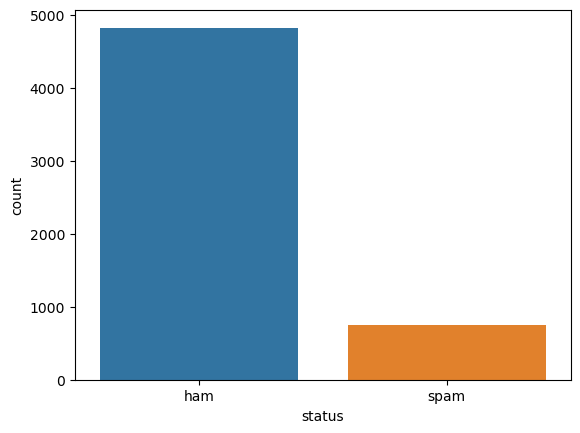

In [10]:
sns.countplot(data=df,x="status")

In [11]:
df['status'].value_counts()

ham     4825
spam     747
Name: status, dtype: int64

In [12]:
from wordcloud import WordCloud

In [13]:
wc = WordCloud(width = 300, height=300, min_font_size=10, background_color='white')

In [14]:
from word_process import WordProcess

In [15]:
wp = WordProcess()

[nltk_data] Downloading package stopwords to /Users/suraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/suraj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/suraj/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [16]:
df['processed'] = df['sms'].apply(wp.process_sent2sent)

In [17]:
df.head()

,status,sms,processed
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [18]:
df.iloc[5567]

status                                                    spam
sms          This is the 2nd time we have tried 2 contact u...
processed    2nd time try contact 750 pound prize claim eas...
Name: 5567, dtype: object

In [19]:
df['sms'][5567]

'This is the 2nd time we have tried 2 contact u. U have won the Ã\x83Â\x83Ã\x82Â¥Ã\x83Â\x82Ã\x82Â£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'

In [20]:
spam_wc = wc.generate(df[df['status']== 'spam']['processed'].str.cat(sep=' '))

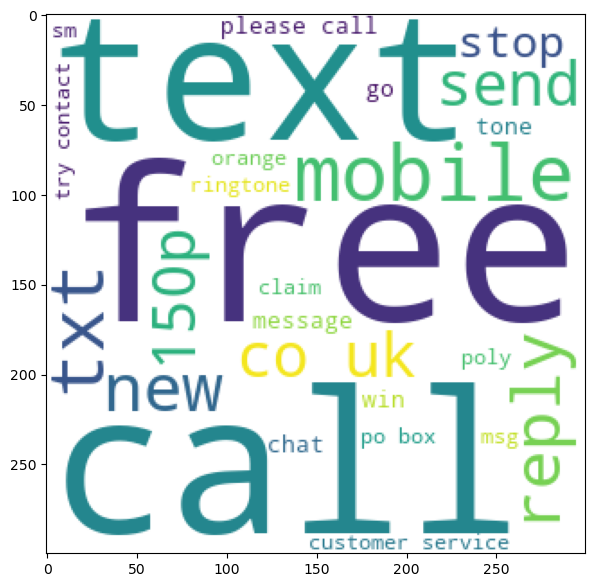

In [21]:
plt.figure(figsize=(16,7))
plt.imshow(spam_wc)

In [22]:
ham_wc = wc.generate(df[df['status']== 'ham']['processed'].str.cat(sep=" "))

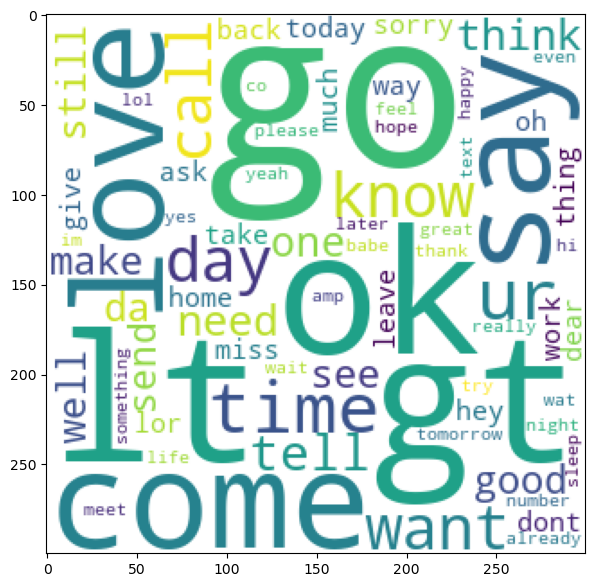

In [23]:
plt.figure(figsize=(16,7))
plt.imshow(ham_wc)